# Author: SHREERAKSHA

# Task 2: Prediction using unsupervised ML

### Iris is the family in the flower which contains the several species such as the 
### iris.setosa,iris.versicolor,iris.virginica,etc.
### So here we are using unsupervised learning i.e KMeans algorithm
### to detect and classify the species of Iris
![Title](img/task2.png)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset


In [64]:
df=pd.read_csv("Iris.csv")
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [115]:
np.array(df)


array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [113]:
df1=df.iloc[:,1:]
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Separation of dependent and independent matrix

In [68]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [69]:
y[0]

'Iris-setosa'

#### Handling Categorical data

In [70]:
from sklearn.preprocessing import LabelEncoder
y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### Applying Kmeans Clustering Algo

In [71]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,n_init=150)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=150, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Finding the optimum number of clusters for k-means classification

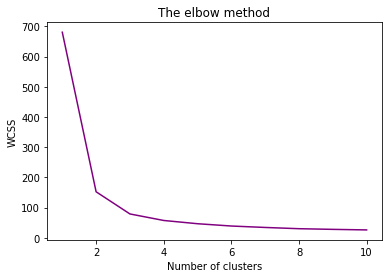

In [89]:


x = df1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,color="purple")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

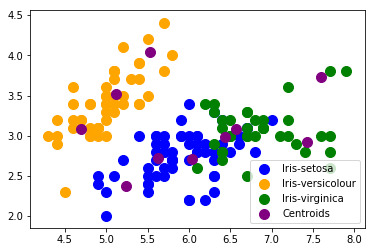

In [110]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')

plt.legend()

In [103]:
pd.DataFrame({'Predictions':y_kmeans,'Actual':y})

,Actual,Predictions
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


#### Direct cluster analysis using Seaborn

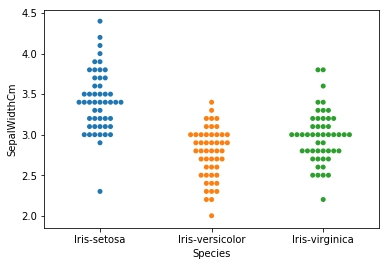

In [112]:
sns.swarmplot(x='Species',y='SepalWidthCm',data=df1)

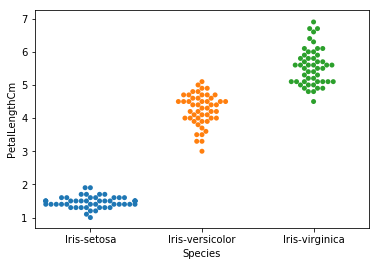

In [111]:
sns.swarmplot(x='Species',y='PetalLengthCm',data=df1)